#### imports

In [ ]:
import tensorflow as tf
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
print("TF Version:", tf.__version__ )

# Part 1

In [2]:
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]
xs = tf.constant(X.astype(np.float32))
ys = tf.constant(Y.astype(np.float32))

In [3]:
#compute gaussian OG
zs = tf.exp(-(xs**2 + ys**2)/2.0)

In [4]:
#compute sine
theta = np.pi
f = 1
zs = tf.math.sin(2 * np.pi * f * (xs * tf.math.cos(theta) + ys * tf.math.sin(theta)))

In [5]:
#product of two functions
theta = np.pi / 4
f = 1
zs = (tf.exp(-(xs**2 + ys**2)/2.0)) * (tf.math.sin(2 * np.pi * f * (xs * tf.math.cos(theta) + ys * tf.math.sin(theta))))

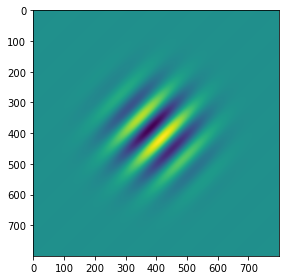

In [6]:
plt.imshow(zs.numpy())
plt.tight_layout()
plt.show()

# Part 2

In [ ]:
#base layout
Y, X = np.mgrid[-1.3:1.3:0.001, -2:1:0.001]
Z = X+1j*Y
#for different zoom
#Z = (Z - 4) * 0.25

In [8]:
xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))

In [9]:
#mandelbrot
for i in range(200):
    #Compute the new values of z: z^2 + x
    zs_ = zs*zs + xs
    # Have we diverged with this new value?
    not_diverged = tf.abs(zs_) < 4
    # Update variables to compute
    ns.assign_add(tf.cast(not_diverged, tf.float32))
    zs.assign(zs_)

: 

: 

: 

: 

: 

: 

In [26]:
#julia
c = 0.4 - 0.27j
for i in range(200):
    #Compute the new values of z: z^2 + x
    zs_ = zs*zs + c
    # Have we diverged with this new value?
    not_diverged = tf.abs(zs_) < 4
    # Update variables to compute
    ns.assign_add(tf.cast(not_diverged, tf.float32))
    zs.assign(zs_)

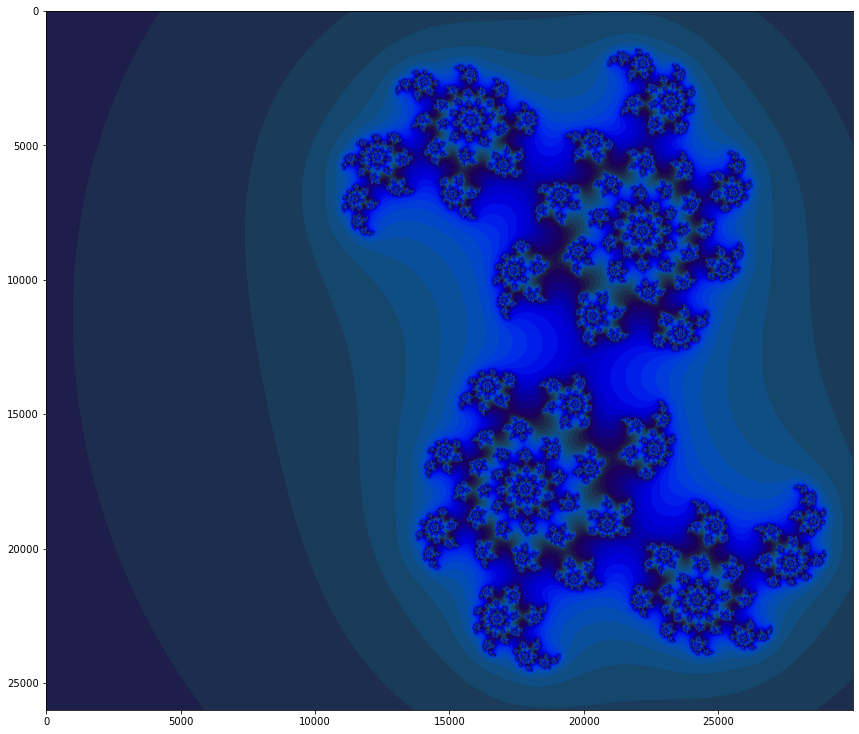

In [ ]:
fig = plt.figure(figsize=(16,10))
def processFractal(a):
    """Display an array of iteration counts as a
    colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a
    
plt.imshow(processFractal(ns.numpy()))
plt.tight_layout(pad=0)
plt.show()

# Part 3

(4, 2)


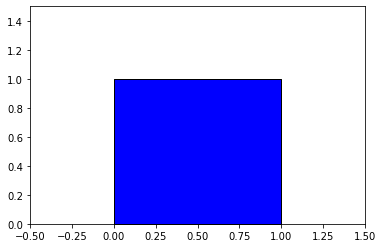

In [19]:
from matplotlib.collections import PolyCollection
initial_square_verts = [[0.0, 0.0], [1.0, 0.0], [1.0, 1.0], [0.0, 1.0]]
initial_square_verts = np.array(initial_square_verts)

print(initial_square_verts.shape)

poly = PolyCollection([initial_square_verts], facecolors = 'blue', edgecolors='k', linewidth=1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0, 1.5)

ax.add_collection(poly)

plt.show()
